In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datos_limpios.csv', parse_dates=['timestamp_extraccion'])


In [3]:
df

,id_extraccion,timestamp_extraccion,marca,precio_contado,precio_financiado,precio_nuevo,ubicacion,kilometraje,combustible,es_km0,...,longitud,transmision,tipo_carroceria,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,modelo
0,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086439,ABARTH,22990.0,20900.0,NaN,Madrid,23213.0,Gasolina,False,...,-3.7038,Manual,Desconocido,0.0,179.0,2.0,12.0,2022.0,12,500 C 695C 1.4 16v T-Jet 132kW (180 CV)
1,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086694,ABARTH,23990.0,20990.0,NaN,Barcelona,97814.0,Gasolina,False,...,2.1734,Automático,Desconocido,2.0,170.0,2.0,12.0,2018.0,12,124 SPIDER Spider Turbo Multiair 125kW Auto
2,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.086996,ABARTH,22500.0,20500.0,31600.0,Málaga,33602.0,Gasolina,False,...,-4.4214,Manual,Berlina,4.0,165.0,3.0,3.0,2022.0,12,595 1.4T JET 121KW
3,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087274,ABARTH,22950.0,NaN,NaN,Islas Baleares,48500.0,Gasolina,False,...,3.0176,Manual,Pequeño,4.0,180.0,3.0,2.0,2018.0,12,695 Pequeño Manual de 3 Puertas
4,https://www.autocasion.com/coches-segunda-mano...,2025-06-20 21:10:20.087595,ABARTH,16999.0,15713.0,NaN,Barcelona,32922.0,Gasolina,False,...,2.1734,Manual,Desconocido,0.0,145.0,3.0,7.0,2020.0,12,500 1.4 Turbo 595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156646,YOOUDOOO,17590.0,15590.0,18980.0,La Rioja,2.0,Gasolina,False,...,-2.4450,Manual,Todo Terreno,5.0,109.0,5.0,2.0,2025.0,36,Y2 1.5L Comfort
99925,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156777,YOOUDOOO,26838.0,25838.0,NaN,Barcelona,10.0,Eléctrico,False,...,2.1734,Automático,Pequeño,5.0,95.0,5.0,8.0,2024.0,12,K3 YUDO Pequeño Automático de 5 Puertas
99926,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.156928,YOOUDOOO,21900.0,21900.0,24998.0,Sevilla,3000.0,Eléctrico,False,...,-5.9845,Automático,Todo Terreno,5.0,95.0,5.0,7.0,2024.0,96,K3 70kW
99927,https://www.autocasion.com/coches-km0/km-0/yud...,2025-06-21 00:33:12.157050,YOOUDOOO,22990.0,19990.0,24998.0,La Rioja,4585.0,Eléctrico,False,...,-2.4450,Automático,Todo Terreno,5.0,95.0,5.0,1.0,2025.0,84,K3 70kW


In [4]:
df["transmision"].unique()

array(['Manual', 'Automático'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109053 entries, 0 to 109064
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   precio                          109053 non-null  float64
 1   financiacion_disponible         109053 non-null  bool   
 2   descuento                       109053 non-null  float64
 3   kilometraje                     109053 non-null  float64
 4   es_km0                          109053 non-null  bool   
 5   es_demo                         109053 non-null  bool   
 6   latitud                         109053 non-null  float64
 7   longitud                        109053 non-null  float64
 8   tipo_carroceria                 109053 non-null  object 
 9   asientos                        109053 non-null  float64
 10  potencia                        109053 non-null  float64
 11  puertas                         109053 non-null  float64
 12  mes_matriculacion2   

In [4]:
df = df[df['precio'] > 650].copy()

df['log_precio'] = np.log1p(df['precio'])




In [5]:
df = df.drop(columns=["id_extraccion", "timestamp_extraccion", "ubicacion"])


In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Suponemos que la variable objetivo ya está limpia y se llama 'precio_log'
target_mean = df.groupby('marca')['log_precio'].mean()

# Reemplazamos cada marca con su media del target
df['marca_encoded'] = df['marca'].map(target_mean)

# Eliminamos la columna original
df = df.drop(columns=['marca'])


In [7]:
from sklearn.preprocessing import OneHotEncoder
import pickle

import os

# Crear el encoder compatible
combustible_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Ajustar y transformar
combustible_encoded = combustible_encoder.fit_transform(df[['combustible']])

# Crear DataFrame con nombres de columnas
combustible_df = pd.DataFrame(combustible_encoded, columns=combustible_encoder.get_feature_names_out(['combustible']), index=df.index)

# Concatenar y eliminar columna original
df = pd.concat([df.drop(columns=['combustible']), combustible_df], axis=1)

# Crear carpeta 'encoders' si no existe
os.makedirs('encoders', exist_ok=True)

# Guardar encoder
with open('encoders/combustible_encoder.pkl', 'wb') as f:
    pickle.dump(combustible_encoder, f)


In [8]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Crear el encoder
le_transmision = LabelEncoder()

# Ajustar y transformar la columna
df['transmision_encoded'] = le_transmision.fit_transform(df['transmision'])

# Guardar el encoder en un archivo pickle para uso posterior
with open('labelencoder_transmision.pkl', 'wb') as f:
    pickle.dump(le_transmision, f)

# Verificar resultado
print(df[['transmision', 'transmision_encoded']].head())

df = df.drop(columns=['transmision'])

  transmision  transmision_encoded
0      Manual                    1
1      Manual                    1
2  Automático                    0
3      Manual                    1
4  Automático                    0


In [6]:
print("Valor mínimo:", df["precio"].min())
print("Valor máximo:", df["precio"].max())


Valor mínimo: 650.0
Valor máximo: 6449900.0


In [7]:
pd.set_option('display.max_colwidth', None)


In [7]:
df[df['precio'] < 1000][['id_extraccion', 'precio']].sort_values(by='precio')


,id_extraccion,precio
33153,https://www.autocasion.com/coches-segunda-mano...,650.0
72755,https://www.autocasion.com/coches-segunda-mano...,800.0
85538,https://www.autocasion.com/coches-segunda-mano...,800.0
90850,https://www.autocasion.com/coches-segunda-mano...,800.0
67573,https://www.autocasion.com/coches-segunda-mano...,820.0
31012,https://www.autocasion.com/coches-segunda-mano...,900.0
90573,https://www.autocasion.com/coches-segunda-mano...,950.0
47043,https://www.autocasion.com/coches-segunda-mano...,990.0
82680,https://www.autocasion.com/coches-segunda-mano...,999.0


In [9]:
# Ver número de NaNs por columna
nan_counts = df.isnull().sum().sort_values(ascending=False)
print(nan_counts[nan_counts > 0])


Series([], dtype: int64)


In [4]:
df.drop(columns=['id_extraccion'], inplace=True)
df.drop(columns=['timestamp_extraccion'], inplace=True)

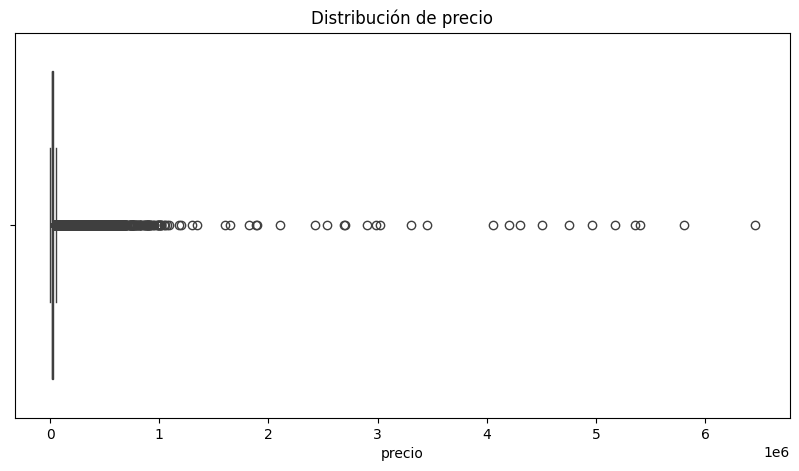

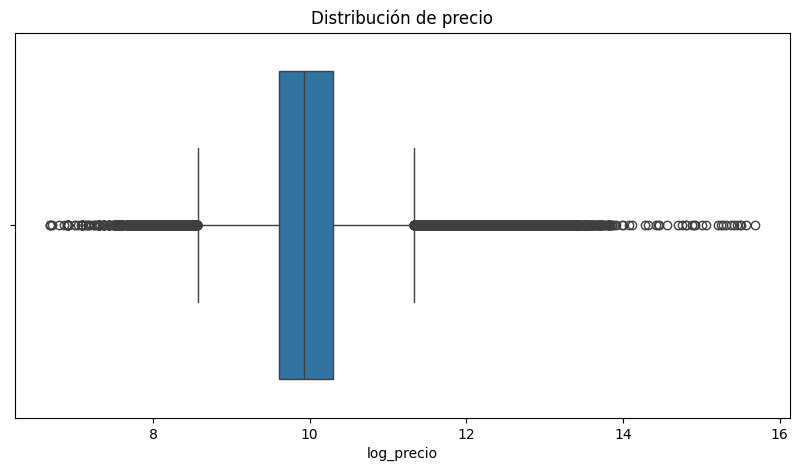

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['precio'])
plt.title('Distribución de precio')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['log_precio'])
plt.title('Distribución de precio')
plt.show()


In [7]:
df['precio_log'] = np.log1p(df['precio'])


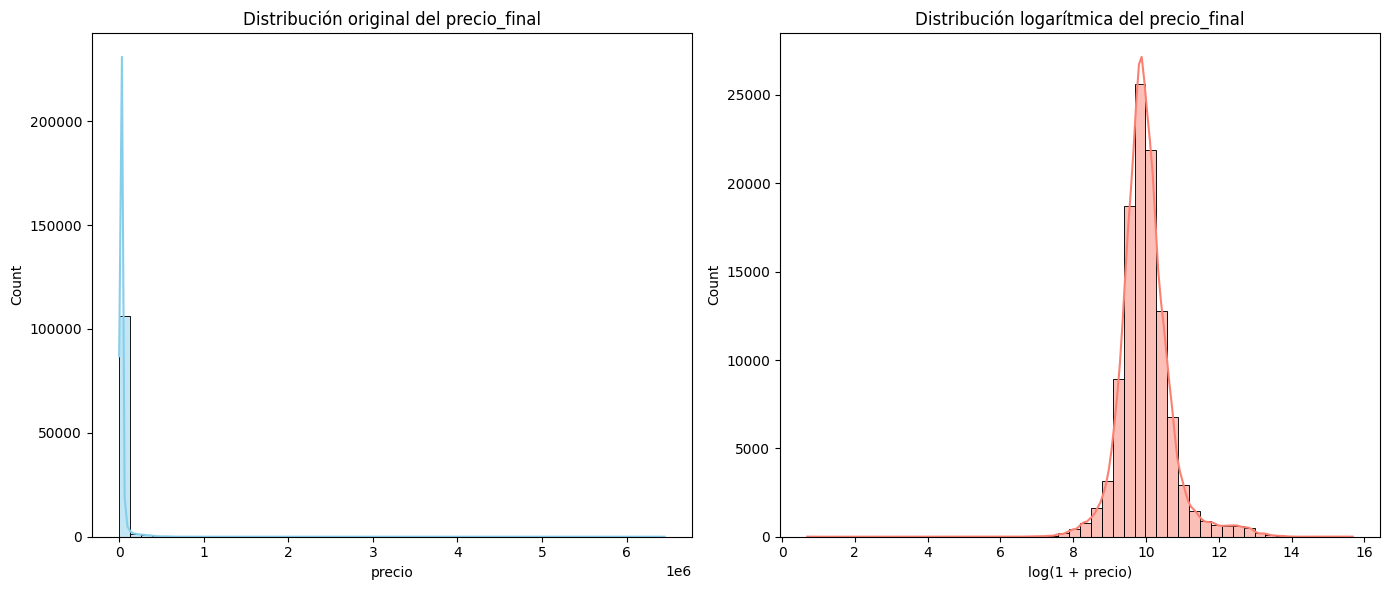

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['precio'], bins=50, kde=True, color='skyblue')
plt.title('Distribución original del precio_final')
plt.xlabel('precio')

plt.subplot(1, 2, 2)
sns.histplot(df['precio_log'], bins=50, kde=True, color='salmon')
plt.title('Distribución logarítmica del precio_final')
plt.xlabel('log(1 + precio)')

plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns='precio', inplace=True)

Nulos en 'descuento': 0

Resumen estadístico:
count    109065.00000
mean         -0.00885
std           0.02609
min          -0.96000
25%           0.00000
50%           0.00000
75%           0.00000
max           0.00000
Name: descuento, dtype: float64


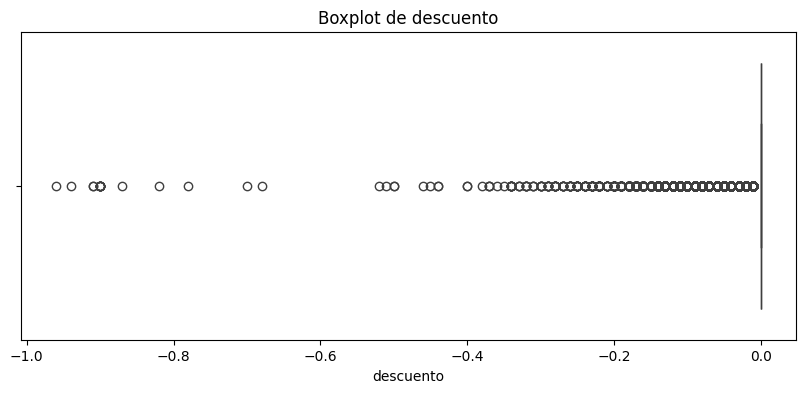

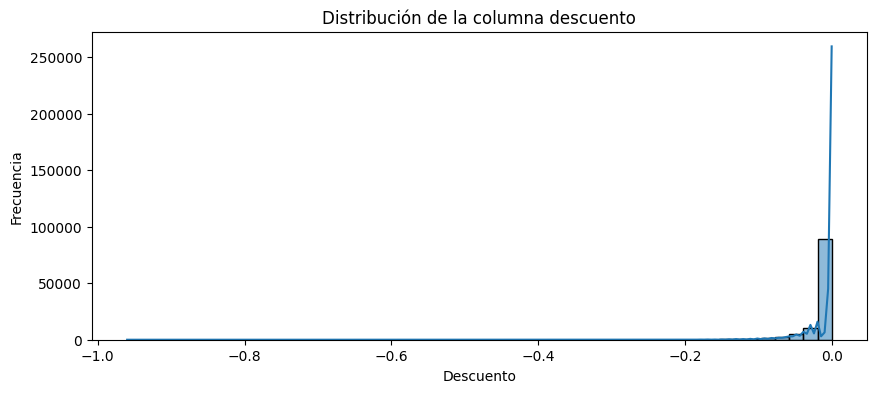

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Verificamos nulos
print("Nulos en 'descuento':", df['descuento'].isnull().sum())

# 2. Estadísticas descriptivas
print("\nResumen estadístico:")
print(df['descuento'].describe())

# 3. Detección de valores extremos (outliers) con boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['descuento'])
plt.title('Boxplot de descuento')
plt.show()

# 4. Histograma para ver la distribución
plt.figure(figsize=(10, 4))
sns.histplot(df['descuento'], bins=50, kde=True)
plt.title('Distribución de la columna descuento')
plt.xlabel('Descuento')
plt.ylabel('Frecuencia')
plt.show()

# 5. Variable binaria para reflejar si hay descuento o no
df['descuento_aplicado'] = df['descuento'].apply(lambda x: 1 if x > 0 else 0)


In [13]:
# Revisar los valores mínimos y máximos
print("Valor mínimo:", df['descuento'].min())
print("Valor máximo:", df['descuento'].max())

# Ver los registros con descuentos muy negativos (por debajo de -0.5)
df[df['descuento'] < -0.5]


Valor mínimo: -0.96
Valor máximo: 0.0


,marca,financiacion_disponible,descuento,ubicacion,kilometraje,combustible,es_km0,es_demo,latitud,longitud,...,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,modelo,precio_final_log,precio_contado_log,descuento_aplicado
3736,AUDI,True,-0.90,Islas Baleares,125.0,Diésel,False,False,39.6953,3.0176,...,5.0,150.0,5.0,4.0,2025.0,24,Q3 35 TDI Genuine edition S tronic 110kW,8.496990,10.799392,1
3834,AUDI,False,-0.90,Córdoba,260000.0,Gasolina,False,False,37.8882,-4.7794,...,5.0,250.0,5.0,7.0,2007.0,0,A3 Sportback 3.2 V6 Ambition quattro S-T,6.673298,8.974745,1
5768,AUDI,True,-0.82,Madrid,169900.0,Gasolina,False,False,40.4168,-3.7038,...,2.0,250.0,2.0,1.0,2005.0,12,TT Roadster 3.2 quattro DSG,8.078068,9.792612,1
5770,AUDI,True,-0.94,Madrid,62900.0,Gasolina,False,False,40.4168,-3.7038,...,5.0,400.0,5.0,6.0,2022.0,12,A3 RS3 Sportback quattro S tronic 294kW,8.187299,11.000448,1
9164,BMW,False,-0.52,La Rioja,39000.0,Híbrido Enchufable,False,False,42.4627,-2.4450,...,5.0,220.0,5.0,3.0,2020.0,12,Serie 2 225xe Active Tourer,9.451009,10.184938,1
9225,BMW,True,-0.90,Pontevedra,28169.0,Diésel,False,False,42.4333,-8.6500,...,5.0,190.0,5.0,5.0,2024.0,24,X3 xDrive 20dA xLine,8.732305,11.034744,1
11703,BMW,False,-0.68,La Rioja,336850.0,Diésel,False,False,42.4627,-2.4450,...,5.0,258.0,5.0,9.0,2015.0,12,X5 xDrive 30dA,8.647695,9.787010,1
13700,BMW,True,-0.51,Madrid,109900.0,Diésel,False,False,40.4168,-3.7038,...,5.0,340.0,4.0,9.0,2021.0,12,Serie 5 540dA xDrive,10.086063,10.799392,1
34280,FORD,False,-0.90,Barcelona,68000.0,Gasolina,False,False,41.3851,2.1734,...,5.0,125.0,5.0,5.0,2013.0,12,C-Max 1.0 Ecoboost Auto-S&S Trend 125,6.508769,8.810012,1
40836,JEEP,True,-0.90,Madrid,9000.0,Híbrido Enchufable,False,False,40.4168,-3.7038,...,5.0,380.0,5.0,8.0,2022.0,12,Wrangler Unlimited 2.0 4xe Sahara 8ATX,8.823353,11.125806,1
